In [ ]:
import random
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

import itertools
import scipy
import scipy.integrate as spi
from scipy.integrate import quad
from scipy.special import erf,erfc
#import cvxpy as cp

from sympy import symbols, solve
from scipy.optimize import fsolve, root
from numpy.polynomial import polynomial as P

In [ ]:
print(scipy.__version__)

1.11.3


In [ ]:
#Run this if in Colab and want to store figure
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
figures_dir = '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


V= 0.35667494393873245


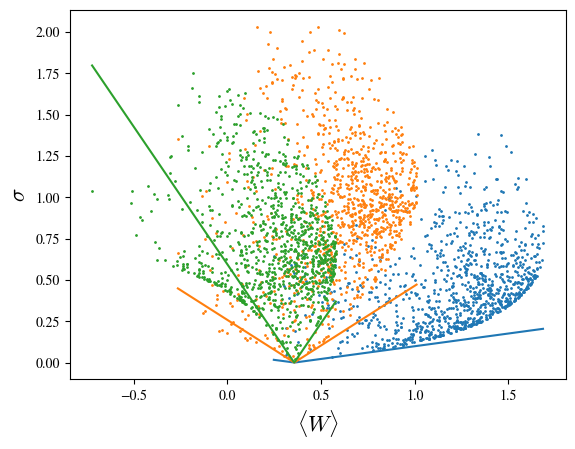

In [ ]:
r=0.7*np.array([0.7,0.1,0.2])

V=-np.log(sum(r))
print("V=",V)
p=np.zeros((1,3))
num_p=3
num_b=1000
sigma_bound=np.zeros(num_b)
for j in range(num_p):
  Wnonopt=np.zeros(num_b)
  sigmanonopt=np.zeros(num_b)
  p0=random.uniform(0,1)
  p1=random.uniform(0,1)
  p2=random.uniform(0,1)
  sum_p=p0+p1+p2
  p=np.array([p0,p1,p2])/sum_p
  for i in range(num_b):
          #b0=random.uniform(0.1, 1) #low, high
          #b1=random.uniform(0.1,b0)
          #b2=1-b1-b0
          b0=random.uniform(0.1,1)
          b1=random.uniform(0.1,1)
          b2=random.uniform(0.1,1)
          sumb=b1+b2+b0
          b0=b0/sumb
          b1=b1/sumb
          b2=b2/sumb
          if b2!=0:
              log=(np.log(b0/r[0]),np.log(b1/r[1]),np.log(b2/r[2]))
              log2=((np.log(b0/r[0]))**2,(np.log(b1/r[1]))**2,(np.log(b2/r[2]))**2)
              Wnonopt[i]=(np.dot(p,log))
              sigmanonopt[i]=(np.sqrt(np.dot(p,log2)-(np.dot(p,log))**2))
  Wnonopt=np.array(Wnonopt)
  sigmanonopt=np.array(sigmanonopt)
  #compute the bound
  q2=(r/sum(r)/p)**2
  q2_ave=np.dot(p,q2)
  sigmaq=np.sqrt(q2_ave-1)
  W_sorted=np.sort(Wnonopt)
  sigma_bound=np.abs(W_sorted-V)/sigmaq
  plt.rcParams['mathtext.fontset'] = 'cm'
  plt.rcParams['font.family'] = 'STIXGeneral'
  plt.scatter(Wnonopt,sigmanonopt,s=1)
  plt.xlabel(r'$\langle W\rangle$',fontsize=16)
  plt.ylabel(r'$\sigma$',fontsize=16)
  plt.plot(W_sorted,sigma_bound)

#Saves figure to google drive

nombre_figura='different_ps_v2.pdf'
plt.savefig(f"{figures_dir}/{nombre_figura}")
